# The Lego Collector's Dilemma  

## Problem statement

You are a die hard Lego enthusiast wishing to collect as many board sets as you can. But before that you wish to be able to predict the price of a new lego product before its price is revealed so that you can budget it from your revenue. Since (luckily!), you are a data scientist in the making, you wished to solve this problem yourself. This dataset contains information on lego sets scraped from lego.com. Each observation is a different lego set with various features like how many pieces in the set, rating for the set, number of reviews per set etc. Your aim is to build a linear regression model to predict the price of a set.


## About the Dataset:
The snapshot of the data, you will be working on :

![Dataset](lego_data.PNG)

You can see that some of the features of `review_difficulty`, `theme_name` and `Country Name` in the data are textual in nature. Don't worry, we have made things simple for you with some behind-the-scenes data preprocessing.  We have also modified the feature of `age`. You will be learning about all these preprocessing techinques in a later concept. For now let us concentrate on getting those Lego sets in your hands soon. :) 

![Dataset](new_le.png)


The dataset has details of 9910 lego sets with the following 10 features

|Feature|Description|
|-----|-----|
|age|Which age categories it belongs to|
|list_price|price of the set (in $)|
|num_reviews|number of reviews per set|
|piece_count| number of pieces in that lego set|
|play_star_rating|ratings|
|review_difficulty|difficulty level of the set|
|star_rating|ratings|
|theme_name|which theme it belongs|
|val_star_rating|ratings|
|country|country name|










## INTRODUCTION 

Our aim here is to predict the price of lego given its other features.
This can be achieved using multiple linear regression.

Multiple linear regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data.


Here our dataset has p=9 features(or independent variables) and one response(or dependent variable) which is the list price.
Also, the dataset contains n = 9910 rows/observations.

## Mathematics
Before proceeding to code, first we go through the rationale behind multiple linear regression

We define:

X (feature matrix) = a matrix of size 9910 X 9 where x_{ij} denotes the values of jth feature for ith observation.

So,
 \begin{pmatrix}  x_{11} & \cdots & x_{9} \\   x_{21} & \cdots & x_{9} \\   \vdots & \ddots & \vdots \\   x_{9910} & \vdots & x_{9}  \end{pmatrix} 

and

y (response vector) = a vector of size 9910 where y_{i} denotes the value of response for ith observation.

 y = \begin{bmatrix} y_{1}\\  y_{2}\\  .\\  .\\  y_{9910} \end{bmatrix} 

The regression line for  features is represented as:
 \begin{equation} h(x_i) = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + .... + \beta_9x_{i9} \end{equation} 
where h(x_i) is predicted response value for ith observation and b_0, b_1, …, b_9 are the regression coefficients.

Also, we can write:
\begin{align*} \newline y_i &= \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + .... + \beta_px_{ip} + \varepsilon_i  \newline or  \newline y_i &= h(x_i) + \varepsilon_i \Rightarrow \varepsilon_i = y_i - h(x_i) 
\end{align*}
where e_i represents residual error in ith observation.

We can generalize our linear model a little bit more by representing feature matrix X as:
  X = \begin{pmatrix}  1 & x_{11} & \cdots & x_{19} \\   1 & x_{21} & \cdots & x_{29} \\   \vdots & \vdots & \ddots & \vdots \\   1 & x_{99101} & \cdots & x_{99109}  \end{pmatrix} 
So now, the linear model can be expressed in terms of matrices as:
$ y = X\beta + \varepsilon $

where,
$ \beta $ = \begin{bmatrix} \beta_0\\  \beta_1\\  .\\  .\\  \beta_9 \end{bmatrix} 

and

$ \varepsilon $ = \begin{bmatrix} \varepsilon_{1}\\  \varepsilon_{2}\\  .\\  .\\  \varepsilon_{9910} \end{bmatrix} 

Now, we determine estimate of b, i.e. b’ using Least Squares method.

Least Squares method tends to determine b’ for which total residual error is minimized.

The result comes out to be:
$ \hat{\beta} = ({X}'X)^{-1} {X}'y $
where ‘ represents the transpose of the matrix while -1 represents the matrix inverse.

Knowing the least square estimates, b’, the multiple linear regression model can now be estimated as:

$ \hat{y} = X\hat{\beta} $

where y’ is estimated response vector.


## Implementing our model in python

Now, we will be implementing our model in python using numpy, sklearn, csv and matplotlib libraries

### Importing Libraries

The given task can be achieved using basic python only but it will be cumbersome, it is better to use libraries

First task is to import the libraries required


In [8]:

import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 
import csv

### Importing Data

The next step is to import data using csv library of python


In [9]:
#The next step is to import data using csv library of python

with open('lego_final.csv', 'r') as f:
    data = list(csv.reader(f, delimiter=','))
data = np.array(data[1:], dtype=np.float)
y = data[:,1]
data = np.delete(data,1,1)
X = data

# Also we have to split the data into feature sets 
# and the output(price of lego set) 

### Splitting the data for Training and Testing

Next we have to split the data into feature sets and the output(list price of lego).
We do this by using train_test_split function which we had imported earlier.

Here we will be testing the model on 40% of the dataset.


In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=1) 

#Here we will be testing the model on 40% of the dataset.

### Training the model 
Now, we train our model using the training set 


In [11]:
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 


Coefficients: 
 [ -0.79249442  -0.10179326   0.09763197  15.92152647  -3.50835441
  -2.05017399   0.43015101 -17.98414929   0.18936394]


## Evaluation of our model

Variance score: 0.7827665947683295


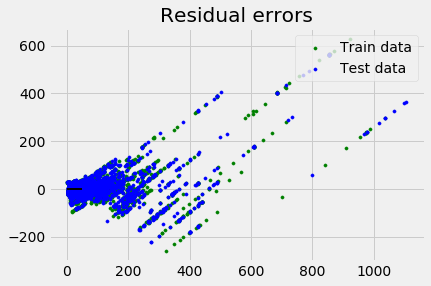

In [13]:
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(y_train,  y_train - reg.predict(X_train) , 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(y_test,  y_test - reg.predict(X_test) , 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

Here, we determine accuracy score using Explained Variance Score.
We define:
explained_variance_score = 1 – Var{y – y’}/Var{y}
where y’ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation.
The best possible score is 1.0, lower values are worse.

In the Residual errors graph we have plotted actual prices vs the difference between actual and predicted values.



## Conclusion

As it can be clearly seen that the graph is crowded around the x-axis, affirms the validity of our model.
